# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 06: Working with other datasets (40 min)

- Time: 8:00 - 8:40:00 EDT, Jul 11, 2024

Welcome to the practical session 06. created by professor Qiyun Zhu and adapted by Nelly Selem (Secodment host), Jeanett Daga (Secodment).


🏆 QUESTIONS

why is important understand the format files in biologic data?

🎯 AIMS

1.   To use 16s EMP dataset to practice clustering.
2.   To use metabolomics EMP dataset.


🔑 KEY POINTS


*   EMP500 project
*   Multi-omics data

---
📥 **Input: Multi-omic dataset from EMP500 project

  16S rRNA gene amplicon data (taxonomic composition)

  Untargeted metabolomics (metabolite-level biochemical activity)

📤 Output:

  Subset data from Latin American samples.

    

[**Omics**](https://en.wikipedia.org/wiki/Omics) refer to the studies of the totality of biological entities within a system. They usually employ high-throughput techniques, such as DNA sequencing and mass spectrometry, to generate information about all molecules, genes, cells, organisms, and more. This information can be analyzed using bioinformatics methods to inform the structure, function and dynamics of the biological entities.

In microbiome research, because isolating and cultivating all microbes in a habitat is usually infeasible, omics are essential tools to characterize the microbiome (the name of which already indicates this nature). The prefix "**meta**-" is usually added to an omic to indicate the study of biological entities from all microorganisms within the environment (e.g., [metagenomics](https://en.wikipedia.org/wiki/Metagenomics)). Omics for microbiota can be employed in combination with omics for their host or the environment to profile a more comprehensive image of the biological system.

Depending on the biological molecules it studies, the most common omics for host and microbiota include:

- Molecule: DNA - mRNA - protein - metabolite
- (Host) ome: genome - transcriptome - proteome - metabolome
- (Microbiota) ome: metagenome - metatranscriptome - metaproteome - (meta)metabolome

In this section, we will use a real-world study -- the **Earth Microbiome Project 500** ([EMP500](https://earthmicrobiome.org/emp500/)), as an example to explore various omic data types. We will navigate the data tables and relevant data files associated with individual omics, discuss the unique challenges and solutions in working with omic data, and compare between omic data types. This process will support the analyses in all subsequent sections.

## Preparation (7 min)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:

    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Installation of skbio (cell [2]) takes approx 3 minutes. It is recomended to run inmediatly after starting the workshop, while the instructor explains the following cells.

In [ ]:
import skbio
skbio.__version__

'0.6.3'

In [ ]:
import pandas as pd

## Mount drive

To use Google Colab and directly mount the shared Google Drive folder containing data files, please execute the following code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Specify your remote directory
HOME = '/content/drive/MyDrive/emp500' # Jeanett
#HOME = '/content/drive/MyDrive/sci-kit-bio_local/emp500/Data' #Nelly

Check if the directory exists by listing its content. you can use the Home directory

In [ ]:
!ls $HOME

amplicon  latam_samples.tsv		   masspec    sample.tsv
assembly  latam_samples_with_tree_ids.tsv  README.md  shotgun


Also you can use the path of your directory to check the content  

## Amplicon sequencing ( 7 min)

**[16S rRNA](https://en.wikipedia.org/wiki/16S_ribosomal_RNA) [amplicon](https://en.wikipedia.org/wiki/Amplicon) sequencing** is the classical approach for studying microbiomes. It usually involves high-throughput DNA sequencing of one or several variable regions of the 16S ribosomal RNA gene, which consitutes the backbone of the small subunit of the **prokaryotic** ribosome, and is universally present in all species. Since as early as 1977, researchers have been using 16S rRNA sequencing to identify unculturable microorganisms in the environment. Today, 16S rRNA sequencing remains an affordable, reliable and sensitive method for profiling the composition of microbial communities.

- The EMP500 study also generated **18S rRNA** (for eukaryotes) and internal transcribed spacer (**ITS**, for fungi) amplicon sequencing data. They are not included in this demo dataset, but are available from Qiita in case you want to further practice the skills.

The 16S rRNA data provided are the following

16s.biom → Table showing the abundance of ASVs in each sample.

16s.fa → DNA sequences corresponding to each ASV.

16s.nwk → Phylogenetic tree showing relationships between ASVs.

16s.tax → Taxonomic classification assigned to each ASV.

We are going to extract just the samples from Latino Ameruca from each file

### DNA Sequences

The processed sequencing data are stored in `16s.fa`. This are the first lines of the [FASTA](https://en.wikipedia.org/wiki/FASTA_format)-formatted file.

\>00006499
AAACCAGCACCTCAAGTGGTCAGGAGGATTATTGGGCCTAAAGCATCCGTAGCCGGCTCTGTAAGTTTTCGGTTAAATCCATGTGCTCAACGCATGGGCTGCCGAAAATACTGCATAGCTAGGGAGTGGGAGAGGTAGACGGTACTCAGT

\>00012890
AAAGTAGGAGACGAGCGTTATCCGGATTTACTGGGCGTAAAGCGTGTGCAGGCGGTTCGGCAAGTTGGATGTGAAATCTCCCGGCTCAACTGGGAGGGGTCGTTCAATACTACCAAACTTGAGGGCATCAGAGGAAGGTGGAATTCCGGG

\>00012904
AAAGTAGGATCCGAGCGTTATCCGAATTTACTGGGCGTAAAGCGCGTGCAGGCGGTTCGGTAAGTTGGATGTGAAAGCTCCCGGCTCAACTGGGAGAGGTCGTTCAATACTGCCGGACTCGAGGATGGTAGAGGGAGGTGGAATTCCCGG

\>00024522
AACAGAACCCCCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGTCCGTAGGTGGTTAAGTTAGTCCAAAGTCAAATACTTCAGGCTCAACCTGAGGGACGCTTTGGAGACGGCTTAACTTGAGGGCATTAGGGGTTGATGGAACGGTCG

\>00024634
AACAGAACCCGCAAGCATTATCCGGATTTATTGGGCGTAAAGGGTCCGTAGGTGGTCGGGAAAGTCTAAAGTCAAATACCTTGAGCTTAACTTAAGGGACGCTTTAGAAACTCCCTGACTTGAGGGCGTTAAAGGCTGATAGAACGGTCG.

The method to work with sequence data in scikit-bio was introduced in section 01. For example, let's read the first sequence from the file:

Each sequence is 150 bp in length, which is limited by the sequencing platform (Illumina). It covers a portion of the 16S rRNA V4 region (appr. 252 bp), which has been shown effective and widely adopted in discerning microorganisms. The standard protocol for generating 16S rRNA V4 amplicons is provided at the [EMP website](https://earthmicrobiome.org/protocols-and-standards/16s/).

The raw sequencing data were processed by [Deblur](https://github.com/biocore/deblur) to extract amplicon sequence variants ([ASVs](https://en.wikipedia.org/wiki/Amplicon_sequence_variant)), which represent putatively unique microorganisms in the community. The ASV method provides finer resolution than the traditional operational taxonomic unit ([OTU](https://en.wikipedia.org/wiki/Operational_taxonomic_unit)) method.

The ASVs were then mapped against the **Greengenes 2** (GG2) reference database ([McDonald et al., 2024](https://www.nature.com/articles/s41587-023-01845-1)). The IDs of the ASVs correspond to IDs of reference sequences in the GG2 databases. You can access the database files at:

- https://ftp.microbio.me/greengenes_release/2022.10/



### Data table (16s.biom)


The abundances (i.e., counts) of individual ASVs in indivdual samples are stored in a data table, as provided by the file `16s.biom`. The extension name `.biom` suggests that it is in the Biological Observation Matrix Format ([**BIOM**](https://biom-format.org/)), a computationally efficient format for storing omic data (we will explain why later).

scikit-bio has integrated BIOM in its [`Table`](https://scikit.bio/docs/latest/generated/skbio.table.Table.html) module. Therefore we can directly read a BIOM table.

To work with BIOM file data in Python, we need to install the biom-format package, which provides tools to read, write, and manipulate BIOM tables commonly used in microbiome research. You can install it using:

In [ ]:
#!pip install biom-format
#from biom import load_table, Table # represents the BIOM data structure, allowing manipulation and analysis biom format in python.
#from biom.util import biom_open #  Used for safely reading and writing BIOM files

We are going to filter only the Latin American samples from the (16s.biom) file. To do this, we first need to load the sample IDs from the metadata file.

In [ ]:

latamMetadata_path = github_data_path + "latam/latam_samples.tsv"
latamMetadata_path
latam_df = pd.read_csv(latamMetadata_path, sep='\t', low_memory=False, index_col='sample_name')
latam_sample_ids=latam_df.index
latam_sample_ids[0:10]

Index(['13114.jensen.43.s012', '13114.jensen.43.s013', '13114.jensen.43.s014',
       '13114.pinto.62.s001', '13114.pinto.62.s002', '13114.pinto.62.s003',
       '13114.pinto.62.s004', '13114.pinto.62.s005', '13114.pinto.62.s006',
       '13114.pinto.62.s007'],
      dtype='object', name='sample_name')

In [ ]:
latam_sample_ids = table.filter(common_samples, axis='sample')
latam_sample_ids[:10]

NameError: name 'table' is not defined

UnrecognizedFormatError: Could not detect the format of <_io.BufferedReader>

As shown, the dimensionality of this table is 427269 x 67 (you can also get this by 'table.shape'). This means 67 samples and 427269 observations (a.k.a., features)

Not all sample IDs in the metadata (_n_ = 92) are found in this data table (_n_ = 67). This difference can be attributed to sample loss, insufficient biological materials, inadequate sequencing yield or quality, etc. This is common and one should be cautious about it, especially during multi-omic integration.

The observation IDs are units of microbial components in the community. As discussed above, each observation represents an ASV.

In [ ]:
latam_table.ids('observation')[:10]

array(['08665176', '13062664', '03483654', '21781706', '07176695',
       '18439252', '08434208', '07654326', '22343722', '13688331'],
      dtype='<U8')

In data science, a more generic term "[**feature**](https://en.wikipedia.org/wiki/Feature_(machine_learning)" is typically used to describe all independent variables, regardless of OTUs, ASVs, genes, metabolites, etc. A data table of samples by features like this one is usually referred to as a **feature table**.

### Sparse data

A BIOM table can be converted into a Pandas dataframe. This allows one to take a quick look at the table content. What did you see?

In [ ]:
latam_df = latam_table.to_dataframe()
latam_df.head()

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
08665176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13062664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03483654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21781706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07176695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most cell values are zeros. This means that while there are more than 400k ASVs discovered across the sample collection, each sample only contains a very small subset of them. This indicates an important statistical property of biological omic data that is distinct from many other fields: [**sparsity**](https://en.wikipedia.org/wiki/Sparse_matrix).

One can let scikit-bio report the density (i.e., fraction of non-zero values) of the table:

In [ ]:
latam_table.get_table_density()


0.002042825060782604

That is, only 0.20% of the cell values are non-zero.

In [ ]:
sums = latam_table.sum(axis='sample')
sums[:10]

array([6.2283e+04, 1.4290e+03, 4.1128e+04, 2.4375e+04, 1.9280e+04,
       5.6452e+04, 4.4089e+04, 2.4840e+04, 1.4000e+01, 7.3780e+04])

To efficiently store sparse data, one would avoid storing numerous zeros, but instead only store non-zero cell values and their coordinates. This is referred to as the [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix). This is the underlying data structure of BIOM, as in contrast to the dense matrix as used in e.g. NumPy.

If needed, you can convert the BIOM table into a 2D NumPy array (a dense matrix). To avoid stressing the computer (because the data table is huge!), the following code only converts the first 5 rows and columns of the table.

In [ ]:
latam_table.head().matrix_data.toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Taxonomy

As shown above, there are over 400k features (ASVs) but merely 76 samples in the 16S rRNA amplicon Latam data table. Such a large number of features (referred to as [**high-dimensionality**](https://en.wikipedia.org/wiki/High-dimensional_statistics) in data science) imposes significant challenges to the subsequent analysis (you may read about the "[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)" and intepretation. While there are pure mathematical approaches to mitigate high-dimensionality, biological sciences provide unique, knowledge-based solutions to it.

These features are not a plain list of entities. They are (presumably) microorganisms, and organisms can be classified. The classification of organisms, a.k.a., [**taxonomy**](https://en.wikipedia.org/wiki/Taxonomy), provides a hierarchical system with (usually) some 7-8 fixed ranks to describe the relationships among organisms.

The taxonomic assignments of the ASVs according to the GG2 reference is provided in the file `16s.tax`. It reads like:

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075

00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455

00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__

00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555

00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555

00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__

00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00025034	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__


It is a mapping of ASV IDs to taxonomic **lineage** strings. Each lineage string consists of [seven ranks](https://en.wikipedia.org/wiki/Taxonomic_rank), as indicated by their initials. The seven ranks are (from high to low):

### Filtering the data 16s.tax

Check the path of our data filtered latam_16s.biom and 16s.tax



In [ ]:
!head $HOME/amplicon/16s.tax

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075
00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455
00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__
00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__
00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__

In [ ]:
filtered_taxonomy_file = f'{HOME}/amplicon/latam_16s.tax'
filtered_taxonomy_file

'/content/drive/MyDrive/emp500/amplicon/latam_16s.tax'

In [ ]:
!head $HOME/amplicon/latam_16s.tax

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075
00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455
00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__
00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__
00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__

In [ ]:
ranks = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

The following code can read lineage strings into a Pandas dataframe with columns representing individual ranks.

In [ ]:
taxonomy_latam = {}
with open(f'{HOME}/amplicon/latam_16s.tax', 'r') as f:
    for line in f:
        id_, lineage = line.rstrip().split('\t')
        ranked = [x.split('__')[1] if '__' in x else '' for x in lineage.split('; ')]
        taxonomy_latam[id_] = ranked

# Convert to DataFrame
taxonomy_latam = pd.DataFrame.from_dict(taxonomy_latam, orient='index', columns=ranks).replace('', np.nan)
taxonomy_latam.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
00006499,Archaea,Thermoproteota,Nitrososphaeria_A,Nitrososphaerales,Nitrosopumilaceae,Nitrosopelagicus,Nitrosopelagicus sp000402075
00012890,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,EnvOPS12,UBA8950,UBA8950 sp001872455
00012904,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,NaN,NaN,NaN
00024522,Bacteria,Patescibacteria,Paceibacteria,Paceibacterales,NaN,NaN,NaN
00024634,Bacteria,Patescibacteria,Paceibacteria,Paceibacterales,NaN,NaN,NaN


Given the taxonomy, one can collapse the data table to a specific taxonomic rank. The collapsing process will aggregate (sum) cell values that belong to the same taxonomic group. This not only facilitates biologically meaningful description of community composition, but also serves as a knowledge-guided method of dimensionality reduction. The following example converts the features into the phylum level.

In [ ]:
table_phylum_latam = table.collapse(taxonomy_latam['Phylum'].to_dict(), norm=False, axis='observation')
table_phylum_latam

124 x 67 <class 'biom.table.Table'> with 1659 nonzero entries (19% dense)

After collapsing, the data table becomes:

In [ ]:
table_phylum_latam.to_dataframe().head()

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
Proteobacteria,13452.0,411.0,14881.0,5443.0,6095.0,24189.0,22866.0,5402.0,6.0,72671.0,...,18302.0,0,10084.0,3955.0,7754.0,0,3653.0,46180.0,2108.0,26091.0
Desulfobacterota_C,50.0,0,52.0,0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Planctomycetota,3195.0,70.0,5818.0,1147.0,167.0,22.0,0,887.0,0,0,...,211.0,0,71.0,0,80.0,0,447.0,0,515.0,730.0
Thermoplasmatota,3.0,0,0,0,3289.0,0,0,0,0,0,...,3437.0,0,2028.0,0,157.0,0,0,0,39.0,0
Gemmatimonadota,58.0,21.0,167.0,258.0,59.0,32.0,104.0,180.0,0,0,...,0,0,166.0,0,0,0,458.0,0,50.0,364.0


Note: If you work with a Pandas dataframe instead of a BIOM table, you can achieve this using the `groupby` function.

In [ ]:

# table.to_dataframe().groupby(taxonomy['Phylum']).sum()

It should be noted that 16S rRNA sequencing, particularly V4 region sequencing, can reach a taxonomic resolution as low as **genus**. Despite that the taxonomic assignment also contains species, it is usually considered less reliable to base the analysis on a species-level profile inferred from 16S rRNA data.

However, the emerging technique of **full-length rRNA operon sequencing** largely overcomes this limitation by targetting the entire 16S rRNA gene (about 1.5 kb) or even the entire rRNA operon (about 4.5 kb) with the [long-read sequencing technology](https://en.wikipedia.org/wiki/Third-generation_sequencing). The EMP500 study also generated full-length rRNA operon data, despite not included in this demo dataset. You may consider exploring it as a practice after the tutorial.

**Exercise 2** merges the phylum-level abundance table with metadata from Latin American samples, calculates the relative abundance of each phylum by sample type, selects the 10 most abundant phyla, and visualizes them in a stacked bar plot.

```
#  Load metadata
meta = pd.read_csv(f'{HOME}/latam_samples.tsv', sep='\t', index_col=0)

# Convert the phylum-level BIOM table to a DataFrame (samples as rows)
df_phylum = table_phylum_latam.to_dataframe().T
df_phylum.index.name = 'sample_id'

# Merge phylum data with metadata by sample ID
df_merged = df_phylum.join(meta, how='inner')

# Select only numeric columns (i.e., phylum abundance data)
phyla_columns = df_phylum.columns
df_numeric = df_merged[phyla_columns]

# Group by sample type and sum abundances
grouped = df_merged.groupby('empo_2')[phyla_columns].sum()

# Convert to relative abundances (proportions)
grouped_rel = grouped.div(grouped.sum(axis=1), axis=0)

# Select top 10 most abundant phyla globally
top_phyla = grouped_rel.sum().nlargest(10).index

# Filter to keep only those top 10 phyla
grouped_rel_top = grouped_rel[top_phyla]

# Create stacked bar plot
grouped_rel_top.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.ylabel('Relative Abundance')
plt.title('Top 10 Phyla per Sample Type in Latin America')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Phylum')
plt.tight_layout()
plt.show()
```





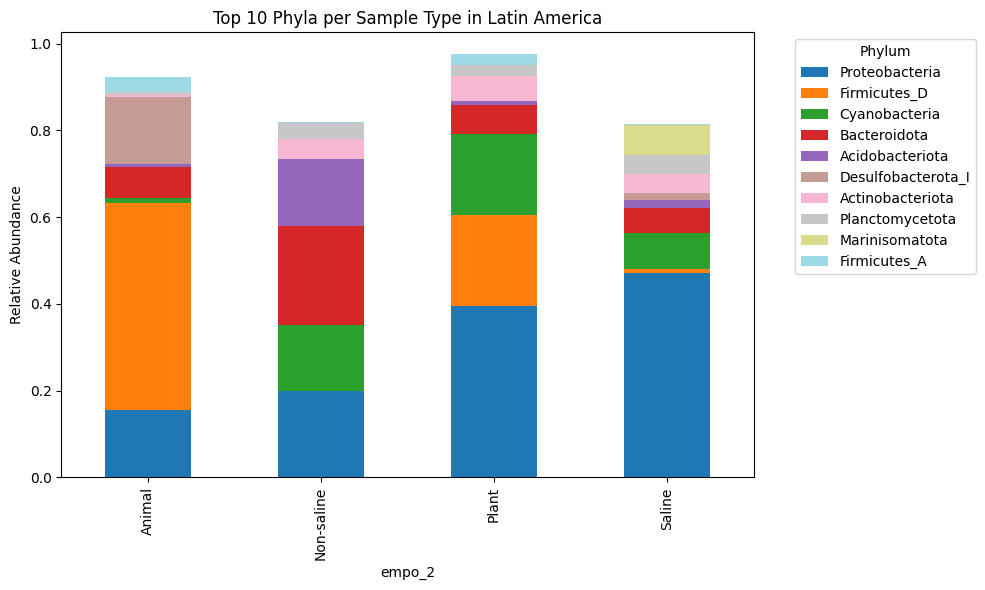

In [ ]:
# Load metadata
meta = pd.read_csv(f'{HOME}/latam_samples.tsv', sep='\t', index_col=0)

# Convert the phylum-level BIOM table to a DataFrame (samples as rows)
df_phylum = table_phylum_latam.to_dataframe().T
df_phylum.index.name = 'sample_id'

# Merge phylum data with metadata by sample ID
df_merged = df_phylum.join(meta, how='inner')

# Select only numeric columns (i.e., phylum abundance data)
phyla_columns = df_phylum.columns
df_numeric = df_merged[phyla_columns]

# Group by sample type and sum abundances
grouped = df_merged.groupby('empo_2')[phyla_columns].sum()

# Convert to relative abundances (proportions)
grouped_rel = grouped.div(grouped.sum(axis=1), axis=0)

# Select top 10 most abundant phyla globally
top_phyla = grouped_rel.sum().nlargest(10).index

# Filter to keep only those top 10 phyla
grouped_rel_top = grouped_rel[top_phyla]

# Create stacked bar plot
grouped_rel_top.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.ylabel('Relative Abundance')
plt.title('Top 10 Phyla per Sample Type in Latin America')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Phylum')
plt.tight_layout()
plt.show()

## Metabolomics